# Data Fetching

In [0]:
#Importation des bibliothèques
import pandas as pd
import os
# 1. Définir les configurations avec vos informations d'identification
account_name = "projet2024"
account_key = "lgJb6ipPO6g8oYsxrl9FonRqMgMBzBIzNI+wwUuiqon7f90iOsN+QEzQkIqyBTOhfY6aOMcVIZv0+AStPrw9Ng=="
file_system_name = "staging"

configs = {
    f"fs.azure.account.key.{account_name}.blob.core.windows.net": account_key
}

# Vérifier si le répertoire est déjà monté
mount_point = "/mnt/adls"
if any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    dbutils.fs.unmount(mount_point)

# 2. Monter le conteneur ADLS dans Databricks
dbutils.fs.mount(
    source = f"wasbs://{file_system_name}@{account_name}.blob.core.windows.net/",
    mount_point = mount_point,
    extra_configs = configs
)

# Définir le nom du fichier et le chemin
file_name = "diplome_master.csv"
local_file_path = "/dbfs" + f"{mount_point}/{file_name}"  # Convertir le chemin DBFS pour un accès local en Pandas

# Vérifier si le fichier existe

if not os.path.isfile(local_file_path):
    raise FileNotFoundError(f"Le fichier {local_file_path} n'a pas été trouvé.")




/mnt/adls has been unmounted.


In [0]:
df = pd.read_csv(local_file_path, sep=';', engine='python', encoding='utf-8', on_bad_lines='warn')
df.head()

,session,eta_uai,eta_nom,acad,acad_lib,acad_reg,acad_reg_lib,ifc,inm,mention,inmp,parcours,alternance,modalite_enseignement,lieux_formation,disci_master,discipline,disci_lib,secteur_disci,secteur_disci_lib,col,n_can,n_can_femme,n_can_etab,n_can_acad,n_can_acad_reg,n_can_lg3,n_can_femme_lg3,n_can_lp3,n_can_femme_lp3,n_can_master,n_can_femme_master,n_can_autre,n_can_femme_autre,n_can_noninscri,n_can_femme_noninscri,n_clas,n_clas_femme,n_clas_etab,n_clas_acad,...,n_prop_femme_lg3,n_prop_lp3,n_prop_femme_lp3,n_prop_master,n_prop_femme_master,n_prop_autre,n_prop_femme_autre,n_prop_noninscri,n_prop_femme_noninscri,n_accept,n_accept_femme,n_accept_etab,n_accept_acad,n_accept_acad_reg,n_accept_debut_pp,n_accept_lg3,n_accept_femme_lg3,n_accept_lp3,n_accept_femme_lp3,n_accept_master,n_accept_femme_master,n_accept_autre,n_accept_femme_autre,n_accept_noninscri,n_accept_femme_noninscri,n_recrut_comp,rang_dernier,pct_accept_femme,pct_accept_etab,pct_accept_acad,pct_accept_acad_reg,pct_accept_debut_pp,pct_accept_lg3,pct_accept_lp3,pct_accept_master,pct_accept_autre,pct_accept_noninscri,id_paysage,id_paysage_actuel,uo_lib_actuel
0,2023,0755976N,Université Paris Cité,A01,Paris,R11,Île-de-France,0900816N1CXR,0900816N,PHYSIQUE FONDAMENTALE ET APPLICATIONS,0900816-11V,"Ingenierie Physique des Energies - (master, s...",0,"INITIALE,CONTINUE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),15,Sciences fondamentales et applications,2,Physique,5,97,27,18.0,42.0,68.0,69.0,22.0,9.0,2.0,3.0,0.0,4.0,0.0,12.0,3.0,5.0,1.0,2.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,NaN,5.0,0.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0,0.0,0.0,5cZyU,5cZyU,Université Paris Cité
1,2023,0755976N,Université Paris Cité,A01,Paris,R11,Île-de-France,0900816NWNGL,0900816N,PHYSIQUE FONDAMENTALE ET APPLICATIONS,0900816-15Z,"Physique fondamentale - (master, sciences, ph...",0,"INITIALE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),15,Sciences fondamentales et applications,2,Physique,27,381,132,68.0,150.0,212.0,319.0,112.0,3.0,1.0,11.0,4.0,19.0,6.0,29.0,9.0,255.0,96.0,67.0,132.0,...,24.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,34,14,32,33,33,19,32,12,0,0,1,1,1,1,0,0,NaN,71.0,41.2,94.1,97.1,97.1,55.9,94.1,0.0,2.9,2.9,0.0,5cZyU,5cZyU,Université Paris Cité
2,2023,0755976N,Université Paris Cité,A01,Paris,R11,Île-de-France,0900821TSP26,0900821T,GENETIQUE,NaN,NaN,0,"INITIALE,CONTINUE,HYBRIDE","UFR SDV - PARIS (75),Université Paris Cité - P...",Sc. fondamentales et appliquées (dont S.T.A.P.S.),9,"Sciences de la vie, de la terre et de l'univers",6,"Sciences de la vie, biologie, santé",45,454,318,96.0,174.0,266.0,331.0,243.0,1.0,1.0,9.0,7.0,46.0,26.0,67.0,41.0,80.0,55.0,42.0,57.0,...,29.0,0.0,0.0,0.0,0.0,35.0,20.0,1,1,40,27,30,35,35,35,9,8,0,0,0,0,30,18,1,1,NaN,78.0,67.5,75.0,87.5,87.5,87.5,22.5,0.0,0.0,75.0,2.5,5cZyU,5cZyU,Université Paris Cité
3,2023,0931238R,Université Sorbonne Paris Nord,A24,Créteil,R11,Île-de-France,0900836JMPF3,0900836J,DROIT,0900836-16Z,M1 Droit Social et Relations Sociales dans les...,0,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,1,"Droit, sciences politiques",36,Sciences juridiques,22,322,261,58.0,93.0,229.0,242.0,202.0,6.0,5.0,11.0,8.0,10.0,7.0,53.0,39.0,133.0,116.0,38.0,48.0,...,66.0,2.0,2.0,3.0,2.0,0.0,0.0,4,4,17,16,9,10,13,4,15,14,1,1,0,0,0,0,1,1,5.0,116.0,94.1,52.9,58.8,76.5,23.5,88.2,5.9,0.0,0.0,5.9,cqyN7,cqyN7,Université Sorbonne Paris Nord
4,2023,0931238R,Université Sorbonne Paris Nord,A24,Créteil,R11,Île-de-France,0900836J58BE,0900836J,DROIT,0900836-17A,M1 Droit Privé Général : M2 Immobilier,0,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,1,"Droit, sciences politiques",36,Sciences juridiques,22,390,297,55.0,100.0,259.0,252.0,193.0,33.0,25.0,11.0,8.0,13.0,8.0,81.0,63.0,158.0,124.0,33.0,41.0,...,48.0,13.0,10.0,2.0,2.0,1.0,0.0,14,13,2

In [0]:
# Display the column names of the DataFrame
df.columns


Index(['session', 'eta_uai', 'eta_nom', 'acad', 'acad_lib', 'acad_reg',
       'acad_reg_lib', 'ifc', 'inm', 'mention', 'inmp', 'parcours',
       'alternance', 'modalite_enseignement', 'lieux_formation',
       'disci_master', 'discipline', 'disci_lib', 'secteur_disci',
       'secteur_disci_lib', 'col', 'n_can', 'n_can_femme', 'n_can_etab',
       'n_can_acad', 'n_can_acad_reg', 'n_can_lg3', 'n_can_femme_lg3',
       'n_can_lp3', 'n_can_femme_lp3', 'n_can_master', 'n_can_femme_master',
       'n_can_autre', 'n_can_femme_autre', 'n_can_noninscri',
       'n_can_femme_noninscri', 'n_clas', 'n_clas_femme', 'n_clas_etab',
       'n_clas_acad', 'n_clas_acad_reg', 'n_clas_lg3', 'n_clas_femme_lg3',
       'n_clas_lp3', 'n_clas_femme_lp3', 'n_clas_master',
       'n_clas_femme_master', 'n_clas_autre', 'n_clas_femme_autre',
       'n_clas_noninscri', 'n_clas_femme_noninscri', 'n_prop', 'n_prop_femme',
       'n_prop_etab', 'n_prop_acad', 'n_prop_acad_reg', 'n_prop_lg3',
       'n_prop_femme_l

# Data Cleaning

In [0]:
# List of columns to drop
columns_to_drop = [
    'n_can_femme', 'n_can_etab', 'n_can_acad', 'n_can_acad_reg', 'n_can_lg3', 
    'n_can_femme_lg3', 'n_can_lp3', 'n_can_femme_lp3', 'n_can_master', 
    'n_can_femme_master', 'n_can_autre', 'n_can_femme_autre', 'n_can_noninscri',
    'n_can_femme_noninscri', 'n_clas', 'n_clas_femme', 'n_clas_etab', 
    'n_clas_acad', 'n_clas_acad_reg', 'n_clas_lg3', 'n_clas_femme_lg3', 
    'n_clas_lp3', 'n_clas_femme_lp3', 'n_clas_master', 'n_clas_femme_master', 
    'n_clas_autre', 'n_clas_femme_autre', 'n_clas_noninscri', 
    'n_clas_femme_noninscri', 'n_prop', 'n_prop_femme', 'n_prop_etab', 
    'n_prop_acad', 'n_prop_acad_reg', 'n_prop_lg3', 'n_prop_femme_lg3', 
    'n_prop_lp3', 'n_prop_femme_lp3', 'n_prop_master', 'n_prop_femme_master', 
    'n_prop_autre', 'n_prop_femme_autre', 'n_prop_noninscri', 
    'n_prop_femme_noninscri',  'n_accept_etab', 
    'n_accept_acad', 'n_accept_acad_reg', 'n_accept_debut_pp', 'n_accept_lg3', 
    'n_accept_femme_lg3', 'n_accept_lp3', 'n_accept_femme_lp3', 
    'n_accept_master', 'n_accept_femme_master', 'n_accept_autre', 
    'n_accept_femme_autre', 'n_accept_noninscri', 'n_accept_femme_noninscri', 
    'n_recrut_comp', 'rang_dernier', 'pct_accept_femme', 'pct_accept_etab', 
    'pct_accept_acad', 'pct_accept_acad_reg', 'pct_accept_debut_pp', 
    'pct_accept_lg3', 'pct_accept_lp3', 'pct_accept_master', 'pct_accept_autre', 
    'pct_accept_noninscri', 'id_paysage', 'id_paysage_actuel','secteur_disci','eta_uai','ifc','inmp','discipline','col', 'n_can','acad','acad_reg','inm'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

df.head()

,session,eta_nom,acad_lib,acad_reg_lib,mention,parcours,alternance,modalite_enseignement,lieux_formation,disci_master,disci_lib,secteur_disci_lib,n_accept,n_accept_femme,uo_lib_actuel
0,2023,Université Paris Cité,Paris,Île-de-France,PHYSIQUE FONDAMENTALE ET APPLICATIONS,"Ingenierie Physique des Energies - (master, s...",0,"INITIALE,CONTINUE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,1,0,Université Paris Cité
1,2023,Université Paris Cité,Paris,Île-de-France,PHYSIQUE FONDAMENTALE ET APPLICATIONS,"Physique fondamentale - (master, sciences, ph...",0,"INITIALE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,34,14,Université Paris Cité
2,2023,Université Paris Cité,Paris,Île-de-France,GENETIQUE,NaN,0,"INITIALE,CONTINUE,HYBRIDE","UFR SDV - PARIS (75),Université Paris Cité - P...",Sc. fondamentales et appliquées (dont S.T.A.P.S.),"Sciences de la vie, de la terre et de l'univers","Sciences de la vie, biologie, santé",40,27,Université Paris Cité
3,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,DROIT,M1 Droit Social et Relations Sociales dans les...,0,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,17,16,Université Sorbonne Paris Nord
4,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,DROIT,M1 Droit Privé Général : M2 Immobilier,0,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,21,19,Université Sorbonne Paris Nord


In [0]:
# 1. Handling Missing Values
df['parcours'] = df['parcours'].fillna('Unknown')

# 2. Data Type Conversion
df['session'] = df['session'].astype(int)
df['alternance'] = df['alternance'].astype(bool)

# 3. Standardizing Text Data
df['mention'] = df['mention'].str.strip().str.lower()


# Display the cleaned DataFrame
df.head()


,session,eta_nom,acad_lib,acad_reg_lib,mention,parcours,alternance,modalite_enseignement,lieux_formation,disci_master,disci_lib,secteur_disci_lib,n_accept,n_accept_femme,uo_lib_actuel
0,2023,Université Paris Cité,Paris,Île-de-France,physique fondamentale et applications,"Ingenierie Physique des Energies - (master, s...",False,"INITIALE,CONTINUE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,1,0,Université Paris Cité
1,2023,Université Paris Cité,Paris,Île-de-France,physique fondamentale et applications,"Physique fondamentale - (master, sciences, ph...",False,"INITIALE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,34,14,Université Paris Cité
2,2023,Université Paris Cité,Paris,Île-de-France,genetique,Unknown,False,"INITIALE,CONTINUE,HYBRIDE","UFR SDV - PARIS (75),Université Paris Cité - P...",Sc. fondamentales et appliquées (dont S.T.A.P.S.),"Sciences de la vie, de la terre et de l'univers","Sciences de la vie, biologie, santé",40,27,Université Paris Cité
3,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,droit,M1 Droit Social et Relations Sociales dans les...,False,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,17,16,Université Sorbonne Paris Nord
4,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,droit,M1 Droit Privé Général : M2 Immobilier,False,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,21,19,Université Sorbonne Paris Nord


In [0]:
df.columns

Index(['session', 'eta_nom', 'acad_lib', 'acad_reg_lib', 'mention', 'parcours',
       'alternance', 'modalite_enseignement', 'lieux_formation',
       'disci_master', 'disci_lib', 'secteur_disci_lib', 'n_accept',
       'n_accept_femme', 'uo_lib_actuel'],
      dtype='object')

# Visuels et Analyses

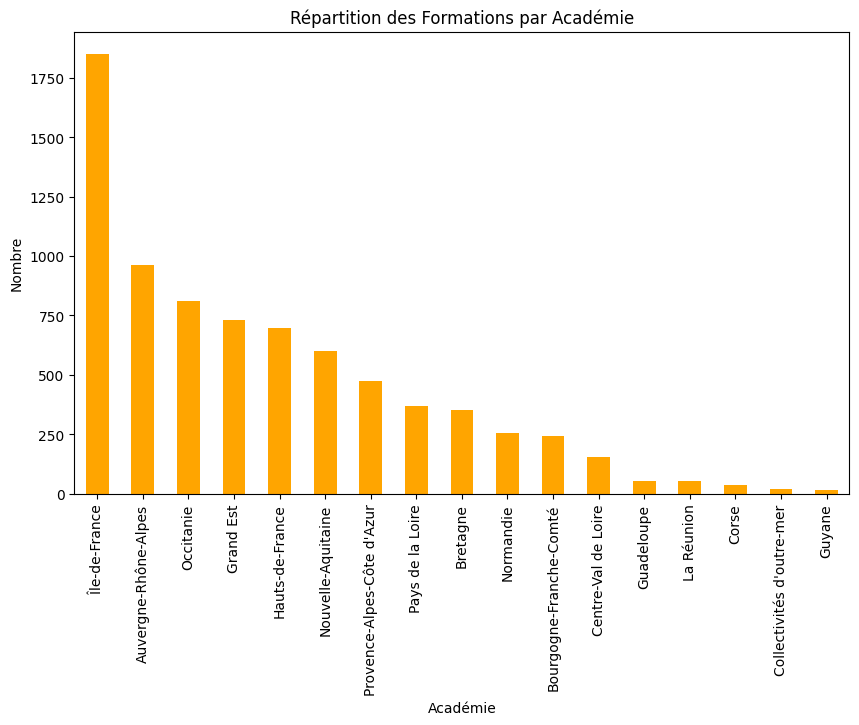

In [0]:
# Répartition des académies
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df['acad_reg_lib'].value_counts().plot(kind='bar', color='orange')
plt.title('Répartition des Formations par Académie')
plt.xlabel('Académie')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.show()


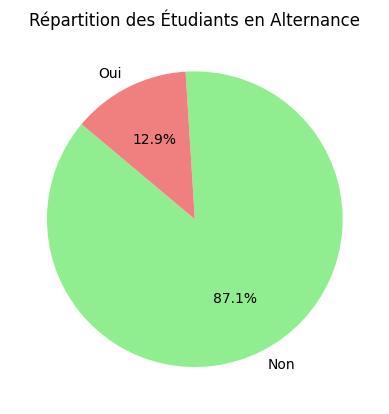

In [0]:
# Analyse de l'alternance
df['alternance'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], labels=['Non', 'Oui'], startangle=140)
plt.title('Répartition des Étudiants en Alternance')
plt.ylabel('')
plt.show()


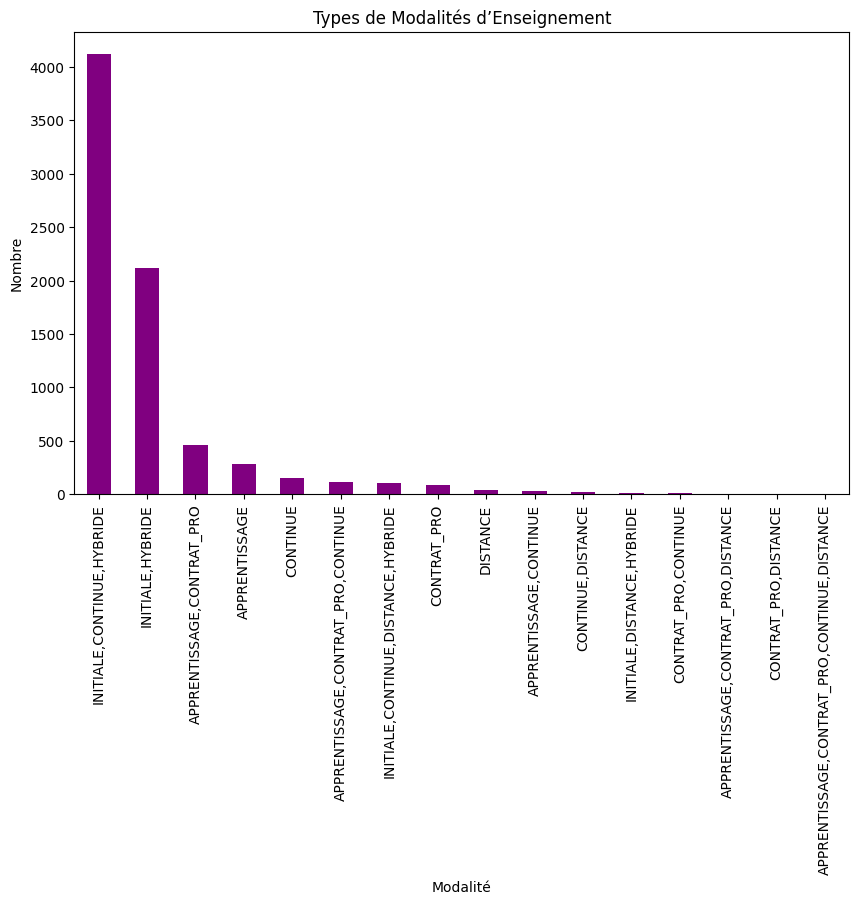

In [0]:
# Modalités d'enseignement
plt.figure(figsize=(10,6))
df['modalite_enseignement'].value_counts().plot(kind='bar', color='purple')
plt.title('Types de Modalités d’Enseignement')
plt.xlabel('Modalité')
plt.ylabel('Nombre')
plt.show()


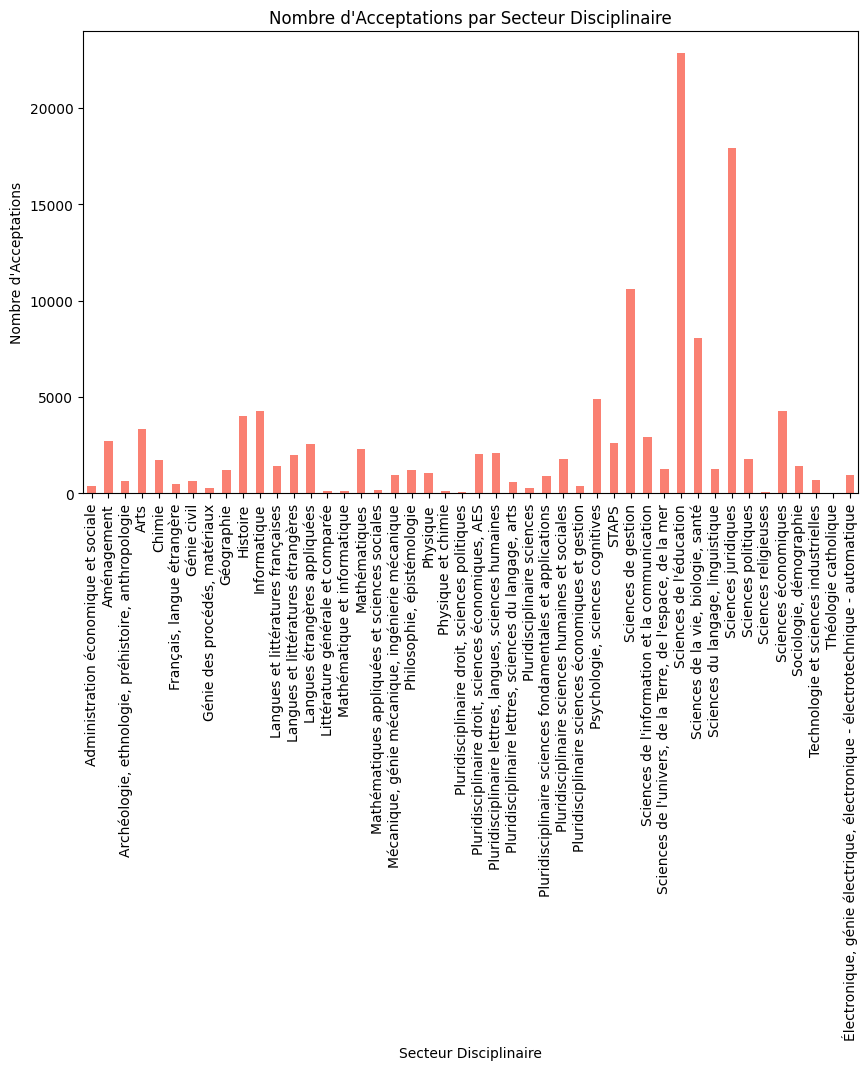

In [0]:
# Acceptations par secteur disciplinaire
plt.figure(figsize=(10,6))
df.groupby('secteur_disci_lib')['n_accept'].sum().plot(kind='bar', color='salmon')
plt.title('Nombre d\'Acceptations par Secteur Disciplinaire')
plt.xlabel('Secteur Disciplinaire')
plt.ylabel('Nombre d\'Acceptations')
plt.show()


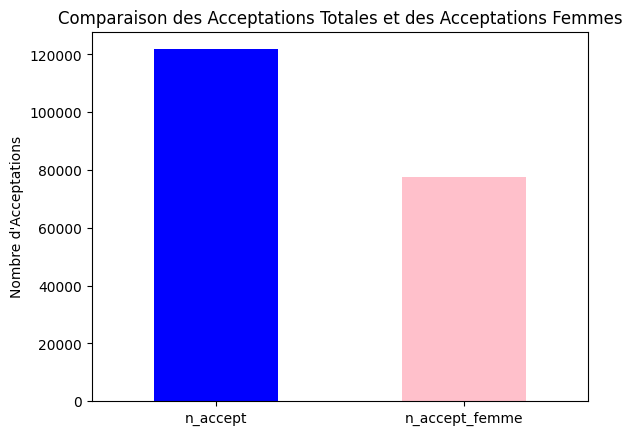

In [0]:
# Acceptations totales vs acceptations femmes
df[['n_accept', 'n_accept_femme']].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparaison des Acceptations Totales et des Acceptations Femmes')
plt.ylabel('Nombre d\'Acceptations')
plt.xticks(rotation=0)
plt.show()


# Sauvegarder dans datawarehouse

In [0]:
container_name = "datawarehouse"
mount_point = "/mnt/datawarehouse"  # This is where the container will be mounted in Databricks

# Configuration settings for mounting the container
configs = {
    f"fs.azure.account.key.{account_name}.blob.core.windows.net": account_key
}

# Unmount the directory if it is already mounted
if any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    dbutils.fs.unmount(mount_point)

# Mount the container to Databricks
dbutils.fs.mount(
    source = f"wasbs://{container_name}@{account_name}.blob.core.windows.net/",
    mount_point = mount_point,
    extra_configs = configs
)

print(f"{container_name} is mounted to {mount_point}")

/mnt/datawarehouse has been unmounted.
datawarehouse is mounted to /mnt/datawarehouse


In [0]:
# Step 1: Define the mount point and directory path using dbfs protocol
directory_path = "/dbfs/mnt/datawarehouse/processed_data"

# Step 2: Re-create the directory in Databricks (to ensure path existence)
dbutils.fs.mkdirs(directory_path)
print(f"Directory {directory_path} created or already exists.")

# Step 3: Verify the directory by listing the contents of the parent directory
display(dbutils.fs.ls("/mnt/datawarehouse"))

# Step 4: Define the full output path for the CSV file
output_file_path = f"{directory_path}/DiplomeFE.csv"

# Step 5: Save the DataFrame as a CSV file in the created directory
df.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")
print(df.head())
df["eta_nom"].value_counts()

Directory /dbfs/mnt/datawarehouse/processed_data created or already exists.


path,name,size,modificationTime
dbfs:/mnt/datawarehouse/checkpoints/,checkpoints/,0,1724022513000
dbfs:/mnt/datawarehouse/processed_data/,processed_data/,0,1724022510000


Data saved to /dbfs/mnt/datawarehouse/processed_data/DiplomeFE.csv
   session  ...                   uo_lib_actuel
0     2023  ...           Université Paris Cité
1     2023  ...           Université Paris Cité
2     2023  ...           Université Paris Cité
3     2023  ...  Université Sorbonne Paris Nord
4     2023  ...  Université Sorbonne Paris Nord

[5 rows x 15 columns]


Université de Lorraine                                          363
Université de Lille                                             347
Université de Montpellier                                       264
Aix-Marseille Université                                        239
Université de Strasbourg                                        233
                                                               ... 
Institut libre d'éducation physique supérieur                     1
École de commerce et management                                   1
École nationale supérieure d'architecture de Lyon                 1
Institut catholique de Rennes                                     1
Institut national des sciences appliquées de Rouen Normandie      1
Name: eta_nom, Length: 113, dtype: int64

# Machine learning models


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prétraitement des données
df_test=df.copy()
# Gérer les valeurs manquantes
df_test.fillna(0, inplace=True)

# Encoder les variables catégorielles
categorical_columns = ['eta_nom', 'acad_lib', 'acad_reg_lib', 'mention', 'parcours', 
                       'modalite_enseignement', 'lieux_formation', 'disci_master', 
                       'disci_lib', 'secteur_disci_lib', 'uo_lib_actuel']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_test[column] = le.fit_transform(df_test[column].astype(str))
    label_encoders[column] = le

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_test)

# Convertir le DataFrame en DataFrame pandas pour la manipulation ultérieure
df_scaled = pd.DataFrame(df_scaled, columns=df_test.columns)

# 2. Séparation des données

# Séparer les features (X) et la cible (y)
X = df_scaled.drop(columns=['n_accept'])  # Toutes les colonnes sauf 'n_accept'
y = df_scaled['n_accept']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraînement du modèle

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# 4. Évaluation du modèle

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le Mean Squared Error (MSE) et le coefficient de détermination R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Comparer les valeurs prédites avec les valeurs réelles
comparison = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})
print(comparison.head())
print(df.head())

Mean Squared Error: 0.14
R^2 Score: 0.85
          Réel    Prédit
4240  0.335610  0.492046
1832 -0.479730 -0.332310
6001 -0.860222 -0.608721
3707  0.281254  0.426756
5365  0.226898  0.270916
   session  ...                   uo_lib_actuel
0     2023  ...           Université Paris Cité
1     2023  ...           Université Paris Cité
2     2023  ...           Université Paris Cité
3     2023  ...  Université Sorbonne Paris Nord
4     2023  ...  Université Sorbonne Paris Nord

[5 rows x 15 columns]


Le modèle de régression linéaire est conçu pour estimer le nombre total d'acceptations (n_accept) en fonction des autres caractéristiques des données, telles que l'établissement, l'académie, le parcours, etc. 
Les résultats montrent que le modèle est relativement performant, expliquant environ 85% de la variance des données avec un MSE faible, ce qui signifie que le modèle prédit généralement bien les valeurs d'acceptation pour de nouvelles données. 

# un autre modele RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 1. Prétraitement des données
df_tests=df.copy()
# Gérer les valeurs manquantes
df_tests.fillna(0, inplace=True)

# Encoder les variables catégorielles
categorical_columns = ['eta_nom', 'acad_lib', 'acad_reg_lib', 'mention', 'parcours', 
                       'modalite_enseignement', 'lieux_formation', 'disci_master', 
                       'disci_lib', 'secteur_disci_lib', 'uo_lib_actuel']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_tests[column] = le.fit_transform(df_tests[column].astype(str))
    label_encoders[column] = le

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_tests)

# Convertir le DataFrame en DataFrame pandas pour la manipulation ultérieure
df_scaled = pd.DataFrame(df_scaled, columns=df_tests.columns)

# 2. Séparation des données

# Séparer les features (X) et la cible (y)
X = df_scaled.drop(columns=['n_accept'])  # Toutes les colonnes sauf 'n_accept'
y = df_scaled['n_accept']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraînement du modèle

# Créer le modèle Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# 4. Évaluation du modèle

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le Mean Squared Error (MSE) et le coefficient de détermination R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Comparer les valeurs prédites avec les valeurs réelles
comparison = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})
print(comparison.head())
print(df.head())

Mean Squared Error: 0.11
R² Score: 0.88
          Réel    Prédit
4240  0.335610  0.519333
1832 -0.479730 -0.379715
6001 -0.860222 -0.833950
3707  0.281254  0.358983
5365  0.226898  0.385617
   session  ...                   uo_lib_actuel
0     2023  ...           Université Paris Cité
1     2023  ...           Université Paris Cité
2     2023  ...           Université Paris Cité
3     2023  ...  Université Sorbonne Paris Nord
4     2023  ...  Université Sorbonne Paris Nord

[5 rows x 15 columns]


In [0]:
df.head()

,session,eta_nom,acad_lib,acad_reg_lib,mention,parcours,alternance,modalite_enseignement,lieux_formation,disci_master,disci_lib,secteur_disci_lib,n_accept,n_accept_femme,uo_lib_actuel
0,2023,Université Paris Cité,Paris,Île-de-France,physique fondamentale et applications,"Ingenierie Physique des Energies - (master, s...",False,"INITIALE,CONTINUE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,1,0,Université Paris Cité
1,2023,Université Paris Cité,Paris,Île-de-France,physique fondamentale et applications,"Physique fondamentale - (master, sciences, ph...",False,"INITIALE,HYBRIDE",UFR Physique – Campus Grands Moulins - PARIS (...,Sc. fondamentales et appliquées (dont S.T.A.P.S.),Sciences fondamentales et applications,Physique,34,14,Université Paris Cité
2,2023,Université Paris Cité,Paris,Île-de-France,genetique,Unknown,False,"INITIALE,CONTINUE,HYBRIDE","UFR SDV - PARIS (75),Université Paris Cité - P...",Sc. fondamentales et appliquées (dont S.T.A.P.S.),"Sciences de la vie, de la terre et de l'univers","Sciences de la vie, biologie, santé",40,27,Université Paris Cité
3,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,droit,M1 Droit Social et Relations Sociales dans les...,False,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,17,16,Université Sorbonne Paris Nord
4,2023,Université Sorbonne Paris Nord,Créteil,Île-de-France,droit,M1 Droit Privé Général : M2 Immobilier,False,"INITIALE,HYBRIDE",Université Sorbonne Paris Nord - VILLETANEUSE ...,Droit et sc. politiques,"Droit, sciences politiques",Sciences juridiques,21,19,Université Sorbonne Paris Nord
